In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
import matplotlib.gridspec as gridspec
from magpie_data import NeLMap2

C:\Users\jdavies\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS


In [21]:
s0429_16_532=NeLMap2('s0429_16 532nm neL.txt', scale=174, multiply_by=1/1.6)

<IPython.core.display.Javascript object>


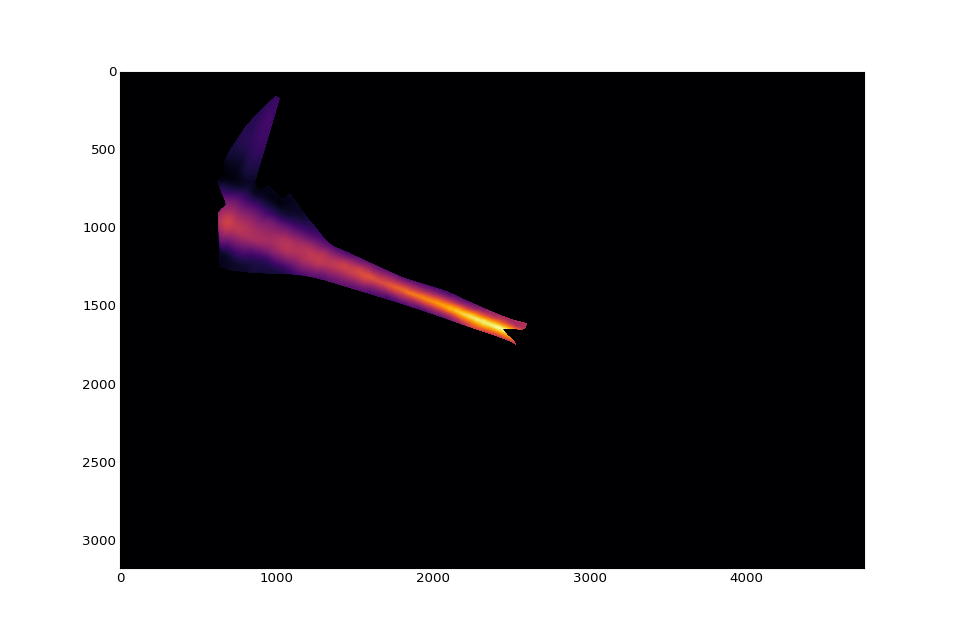

In [22]:
s=s0429_16_532
s.plot_data_px()

In [16]:
s.set_origin(origin=(2880,2348), extent=[-1,12,-3,3])

<IPython.core.display.Javascript object>


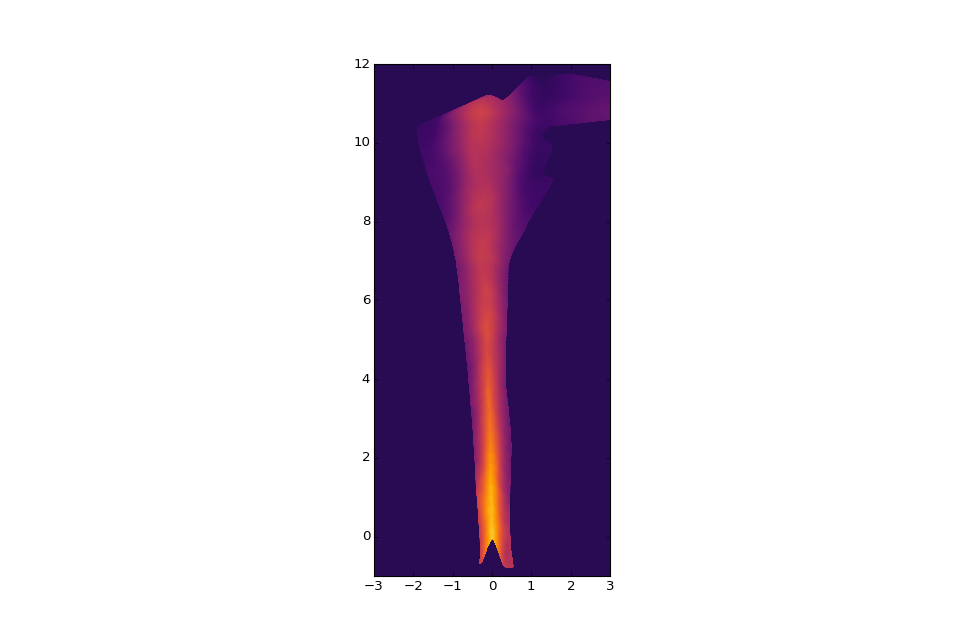

In [17]:
s.plot_data_mm()

In [18]:
s.create_lineout(start=(-1,0),end=(12,0), lineout_width=50)

(0, 522) (2262, 522)


<IPython.core.display.Javascript object>


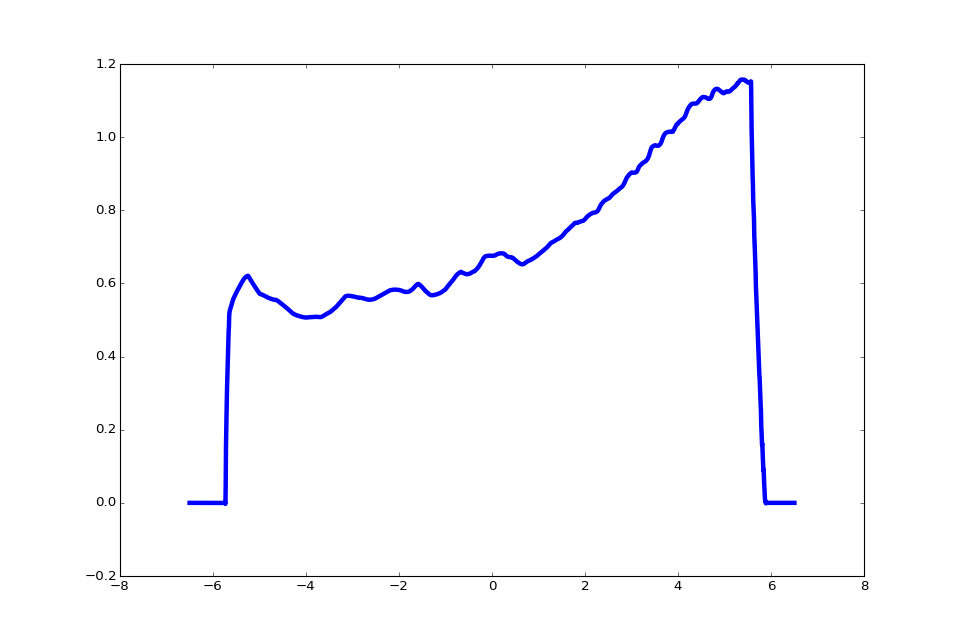

In [20]:
s.plot_lineout(multiply_by=1e-18)

In [23]:
f=[1,8,14]
xx=[1004,1761,2406]
yy=[1054,1350,1604]
        
xm, xc=np.polyfit(f,xx, 1)
ym, yc=np.polyfit(f, yy, 1)
scale=1 #useful if pin positions taken at different scale to shot
y=lambda f: scale*int(f*ym+yc)
x=lambda f: scale*int(f*xm+xc)

<IPython.core.display.Javascript object>


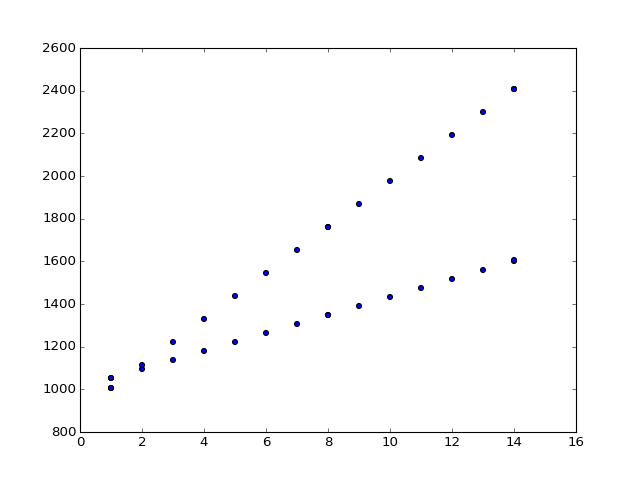

In [29]:
fig,ax=plt.subplots()
ff=range(1,15)
ax.scatter(ff, [y(i) for i in ff])
ax.scatter(f, yy)

ax.scatter(ff, [x(i) for i in ff])
ax.scatter(f, xx)

In [35]:
def average_over_square(array, centre, size):
    square=array[centre[0]-size:centre[0]+size, centre[1]-size:centre[1]+size]
    return np.mean(square)

In [42]:
n_e=[]
for i in range(1,15):
    n_e.append(average_over_square(s.data, centre=[y(i), x(i)], size=15))

In [46]:
import csv
filename='s0429_16 n_e'

data=zip(range(1,15), n_e)
    
with open(filename+'.txt', 'w', newline='') as file:
    cwriter = csv.writer(file, delimiter=',')
    cwriter.writerow(['Fibre', 'n_e'])
    for f in data:
        cwriter.writerow(f)

In [47]:
data